In [1]:
import numpy as np

In [18]:
X = 6 * np.random.rand(100,1) - 3
y = .8*X**2 + .9*X + 3 + 4*np.random.rand(100,1)

In [6]:
import matplotlib.pyplot as plt

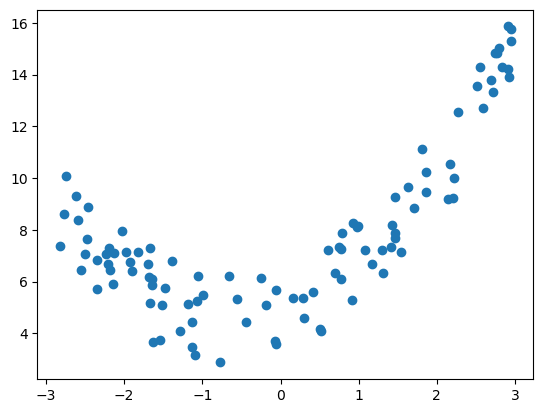

In [19]:
plt.scatter(X,y)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree=10)

In [67]:
X_tr = poly.fit_transform(X)

In [68]:
from sklearn.linear_model import Ridge

In [69]:
r = Ridge(alpha=20)

In [70]:
r.fit(X_tr,y)

Ridge(alpha=20)

In [71]:
y_pred = r.predict(X_tr)

In [72]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)  
X_plot_poly = poly.fit_transform(X_plot)

In [73]:
y_plot = r.predict(X_plot_poly)

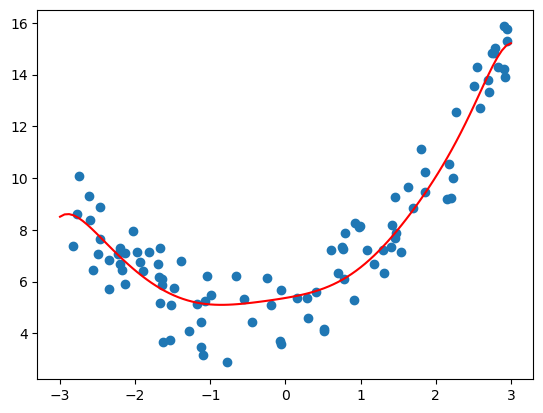

In [74]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,"r-")
plt.show()

In [78]:
from sklearn.datasets import load_diabetes

In [79]:
X,y = load_diabetes(return_X_y = True)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 23)

In [80]:
X.shape

(442, 10)

In [81]:
y.shape

(442,)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [86]:
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_test,lr.predict(X_test))

lr.coef_,lr.intercept_

(array([  -19.84569955,  -271.44799521,   518.60568284,   326.13921989,
        -1003.87022985,   624.04203978,   220.7339424 ,   263.93739547,
          829.85679767,    77.75019971]),
 151.5282462062113)

In [111]:
class NDimRidge:
    def __init__(self,alpha):
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])

        W = np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = W[0]
        self.coef_ = W[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    

In [115]:
rid = NDimRidge(alpha = 1)

In [113]:
rid.fit(X_train,y_train)

In [114]:
rid.coef_,rid.intercept_

(array([  -19.84569955,  -271.44799521,   518.60568284,   326.13921989,
        -1003.87022985,   624.04203978,   220.7339424 ,   263.93739547,
          829.85679767,    77.75019971]),
 151.52824620621132)